<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/main/mcmc/runner_mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Running the MCMC samplers

In [ ]:
%%capture
!pip install corner
!pip install emcee
!pip install SciencePlots --upgrade

In [ ]:
#loading in the data setting up environment etc
import numpy as np
import corner
import pandas as pd
import emcee
import matplotlib.pyplot as plt
import scienceplots

#Use science plots style
plt.style.use(['science', 'no-latex'])

#run the file with the functions
%run '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/mcmc_functions.ipynb'


#loading in the data and assigning variables
filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/LOWZ+ESSENCE+SNLS.csv'
supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z']
distance_mod = supernova_df['MU']
err_distance_mod = supernova_df['MUERR']

#Basic MCMC

In [ ]:
#Running the basic mcmc i have

np.random.seed(69)
num_walkers = 10
n_steps = 10000
step_size = [0.01,0.01]
burn_in = 0.2

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]

samples = metropolis_hastings(log_likelihood, redshift, distance_mod, err_distance_mod, n_steps, initial_guess, step_size, burn_in, num_walkers)

MCMC carried out with 10000 steps, and acceptance ratio of each walker [0.3583 0.365  0.3667 0.3611 0.3635 0.363  0.3647 0.375  0.3608 0.3605]


In [ ]:
#get the omega m and h chains
basic_omega = samples[:,:,0]
basic_h = samples[:,:,1]

#average acceptance rate
walkers_acceptance = [0.3583, 0.365,  0.3667, 0.3611, 0.3635, 0.363,  0.3647, 0.375,  0.3608, 0.3605]
avg_alpha_basic = np.mean(walkers_acceptance)
print(f'Average Acceptance rate = {avg_alpha_basic}')
#check for convergence
gr_basic_omega = gelman_rubin(basic_omega)
gr_basic_h = gelman_rubin(basic_h)

print(f'Convergence for omega = {gr_basic_omega}, h = {gr_basic_h}')


#calculate effective sample size
ess_basic_omega = eff_sample_size_multichain(basic_omega)
ess_basic_h = eff_sample_size_multichain(basic_h)

print(f'Effective sample size for omega = {ess_basic_omega}, h = {ess_basic_h}')

Average Acceptance rate = 0.36386
Convergence for omega = 1.0018016467834943, h = 1.0012827766725576
Effective sample size for omega = 1046.5983335735505, h = 2269.266794279162


In [ ]:
!pip install SciencePlots --upgrade


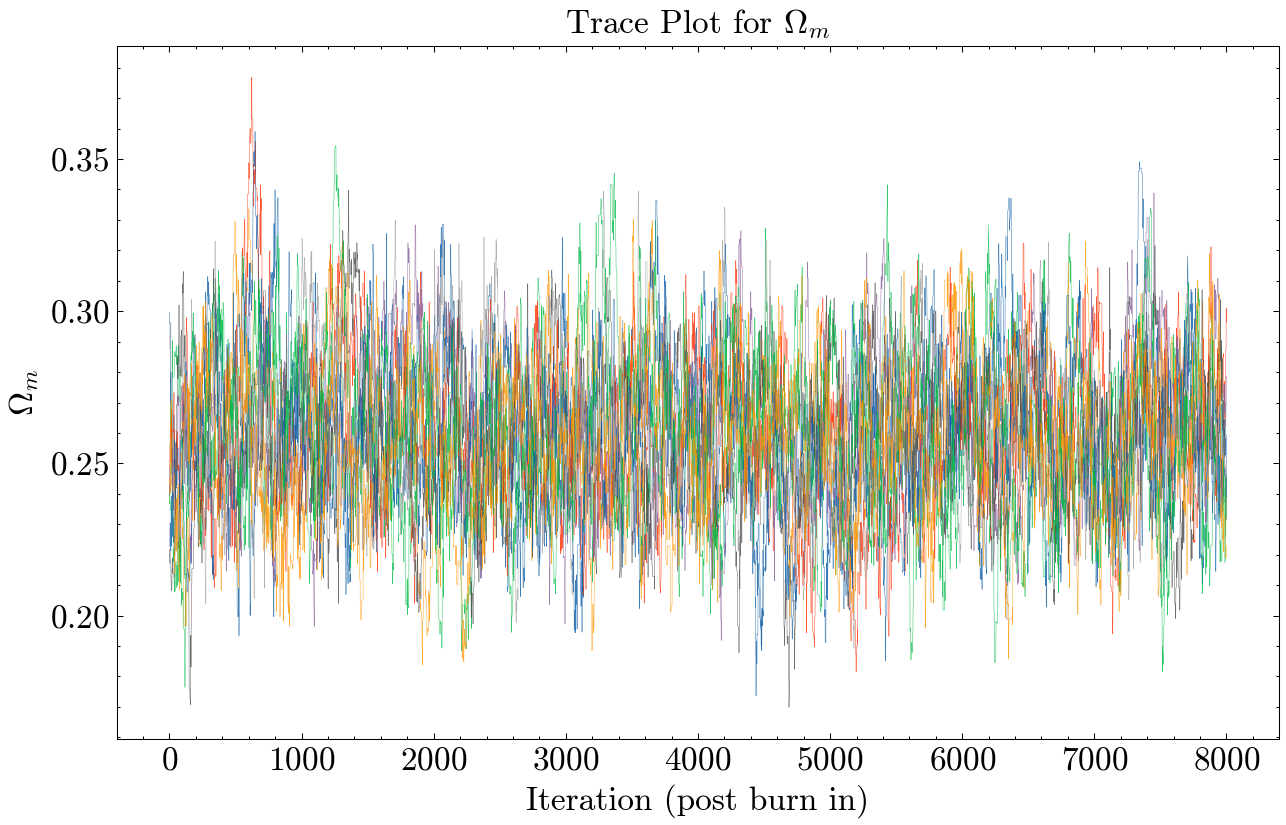

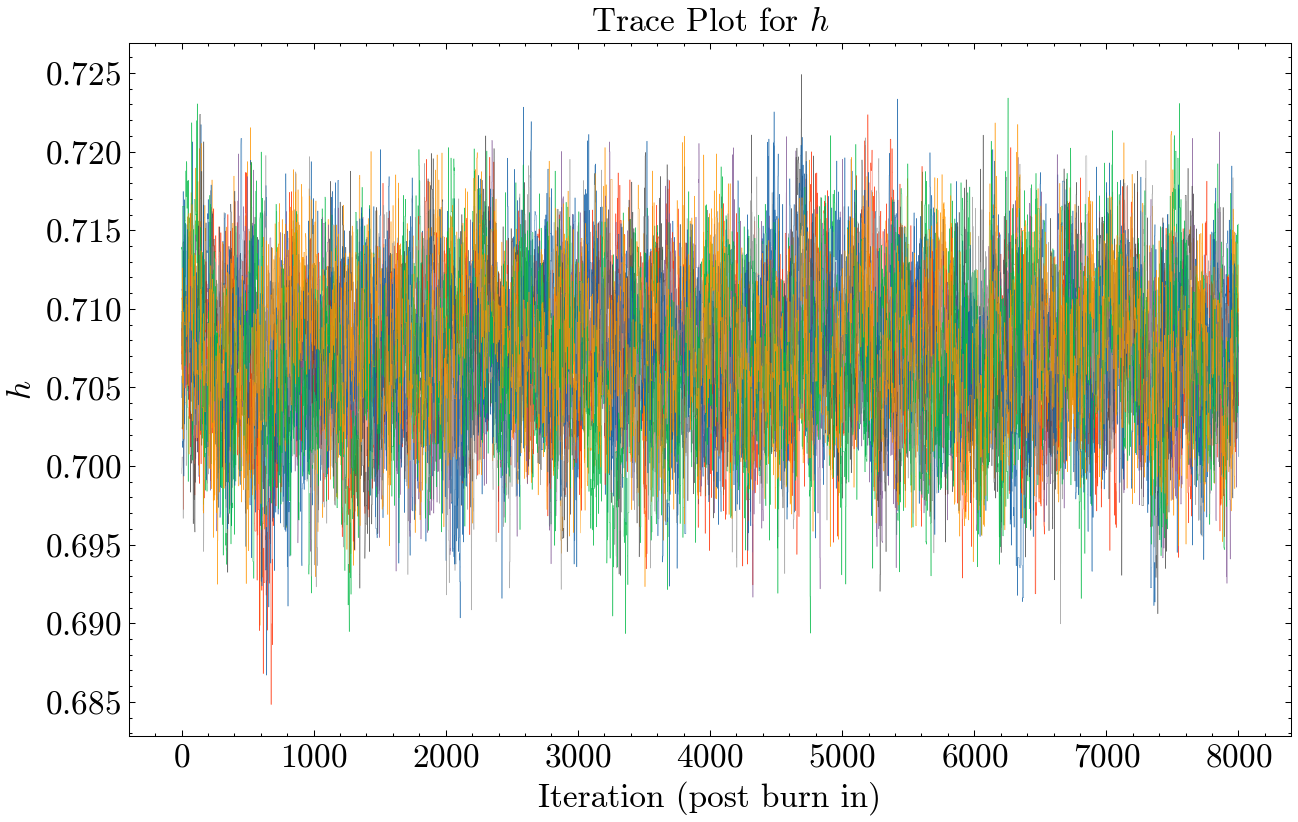

In [ ]:
#trace plotting the basic mcmc
import matplotlib.pyplot as plt
import scienceplots


#omega m
plt.figure(figsize = (10,6), dpi = 150)
plt.style.use(['science', 'no-latex'])
for i in range(num_walkers):
  plt.plot(basic_omega[:,i], alpha = 0.8, linewidth = 0.25)
plt.xlabel('Iteration (post burn in)')
plt.ylabel('$\Omega_{m}$')
plt.title('Trace Plot for $\\Omega_{m}$')
plt.show()


#h
plt.figure(figsize = (10,6), dpi = 150)
plt.style.use(['science', 'no-latex'])
for i in range(num_walkers):
  plt.plot(basic_h[:,i], alpha = 0.8, linewidth = 0.25)
plt.xlabel('Iteration (post burn in)')
plt.ylabel('$h$')
plt.title('Trace Plot for $h$')
plt.show()

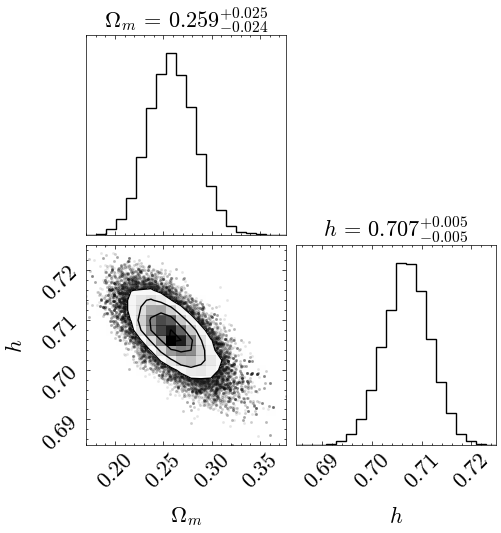

In [ ]:
#Corner plot for basic

#reshape the chains
flattened_samples = samples.reshape(-1, samples.shape[-1])
labels = [r'$\Omega_m$', r'$h$']

#plot
corner.corner(flattened_samples, labels=labels, show_titles = True, title_fmt='.3f')
plt.show()

#Adaptive MCMC
* Using best parmaters from the pilots

In [ ]:
np.random.seed(69)
num_walkers = 10

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]

n_steps = 10000
step_size = [0.01,0.01]
update_interval = 100
learning_rate = 0.1
target_alpha = 0.2
burn_in = 0.2

#running mcmc
adaptive_samples, avg_alpha, cov_hist, step_hist = adaptive_metropolis_hastings(log_likelihood,
                                                                         redshift,
                                                                         distance_mod,
                                                                         err_distance_mod,
                                                                         n_steps,
                                                                         initial_guess, step_size,
                                                                         burn_in, num_walkers, update_interval, target_alpha, learning_rate)


MCMC carried out with 10000 steps, and average acceptance rate of each walker 0.49711


In [ ]:
#get the omega and h chains
adaptive_omega = adaptive_samples[:,:,0]
adaptive_h = adaptive_samples[:,:,1]

#get average acceptance rate
avg_alpha_adaptive = avg_alpha
print(f'Average Acceptance rate = {avg_alpha_adaptive}')
#check for convergence
gr_adaptive_omega = gelman_rubin(adaptive_omega)
gr_adaptive_h = gelman_rubin(adaptive_h)

print(f'Convergence for omega = {gr_adaptive_omega}, h = {gr_adaptive_h}')


#calculate effective sample size
ess_adaptive_omega = eff_sample_size_multichain(adaptive_omega)
ess_adaptive_h = eff_sample_size_multichain(adaptive_h)

print(f'Effective sample size for omega = {ess_adaptive_omega}, h = {ess_adaptive_h}')

Average Acceptance rate = 0.49711
Convergence for omega = 1.0010719570264899, h = 1.000387781240913
Effective sample size for omega = 7406.557329311456, h = 7587.739885099484


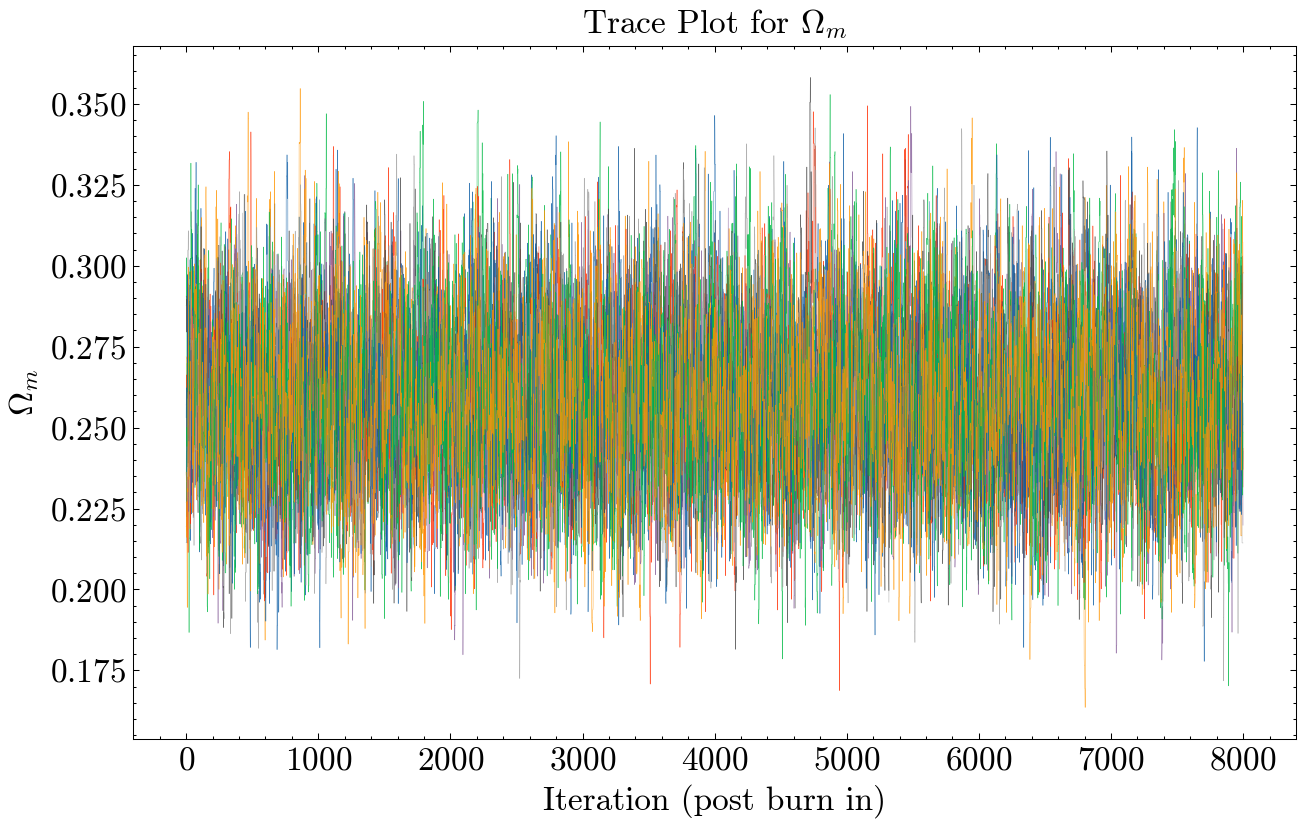

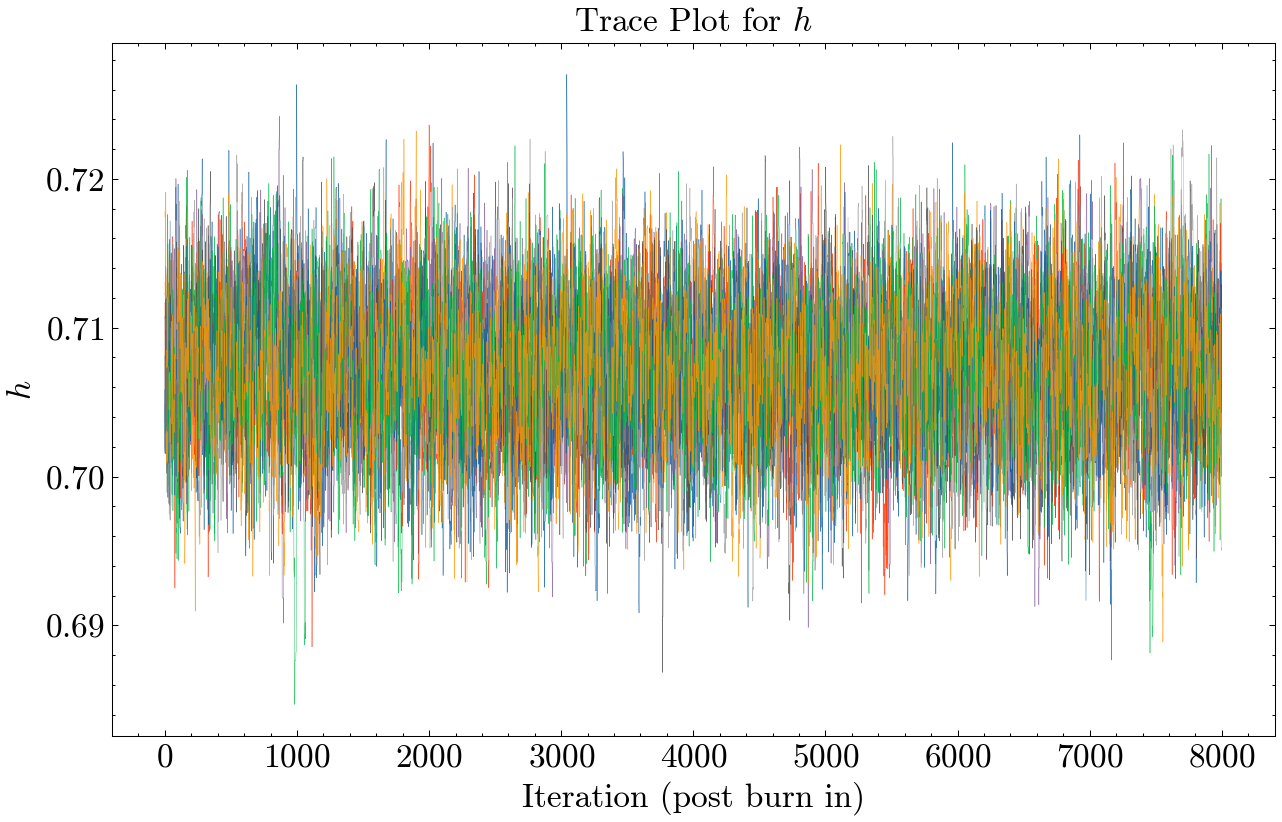

In [ ]:
#trace plot

#omega m
plt.figure(figsize = (10,6), dpi = 150)
plt.style.use(['science', 'no-latex'])
for i in range(num_walkers):
  plt.plot(adaptive_omega[:,i], alpha = 0.8, linewidth = 0.25)
plt.xlabel('Iteration (post burn in)')
plt.ylabel('$\Omega_{m}$')
plt.title('Trace Plot for $\\Omega_{m}$')
plt.show()


#h
plt.figure(figsize = (10,6), dpi = 150)
plt.style.use(['science', 'no-latex'])
for i in range(num_walkers):
  plt.plot(adaptive_h[:,i], alpha = 0.8, linewidth = 0.25)
plt.xlabel('Iteration (post burn in)')
plt.ylabel('$h$')
plt.title('Trace Plot for $h$')
plt.show()

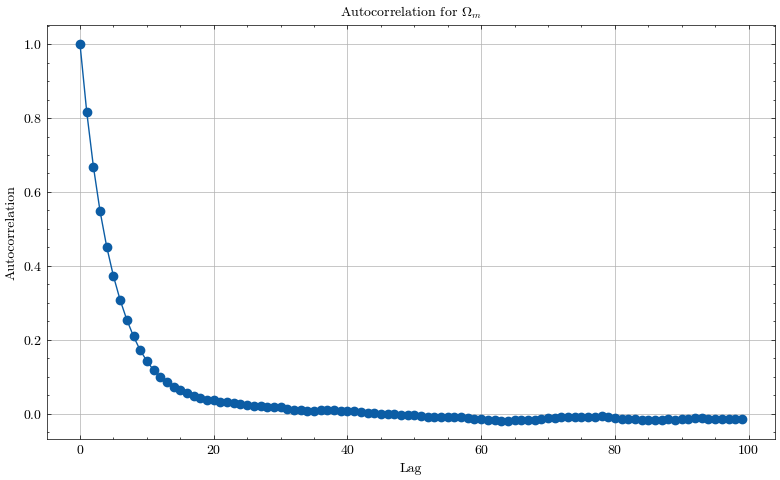

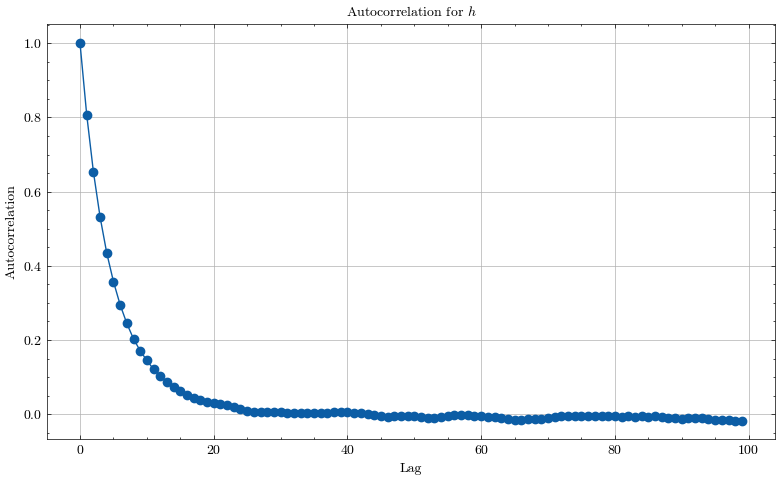

In [ ]:
#plotting autocorrelations

max_lag = 100

for param in range(2):
  auto_correlation_all = [] #empty array to store autocorrelation for each walker
  for walker in range(num_walkers):
    x = adaptive_samples[:, walker, param]
    auto_correlation_values = [autocorrelation(x, lag) for lag in range(max_lag)]
    auto_correlation_all.append(auto_correlation_values)

  #average over all walkers
  mean_auto_correlation = np.mean(auto_correlation_all, axis = 0)

  plt.figure(figsize = (8,5))
  plt.plot(np.arange(max_lag), mean_auto_correlation, marker = 'o')
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  if param == 0:
        plt.title("Autocorrelation for $\Omega_m$", fontsize=10)
  elif param == 1:
        plt.title("Autocorrelation for $h$", fontsize=10)
  plt.grid(True)
  plt.tight_layout()
  plt.show()



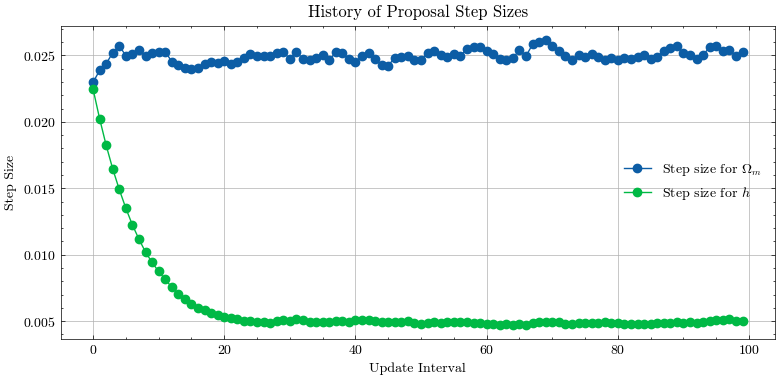

In [ ]:
step_hist = np.array(step_hist)

plt.figure(figsize=(8, 4))
plt.plot(step_hist[:, 0], label=r'Step size for $\Omega_m$', marker='o', linestyle='-')
plt.plot(step_hist[:, 1], label=r'Step size for $h$', marker='o', linestyle='-')
plt.xlabel('Update Interval')
plt.ylabel('Step Size')
plt.title('History of Proposal Step Sizes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


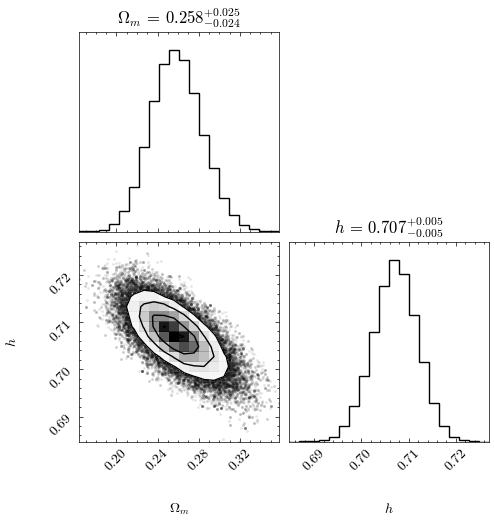

In [ ]:
#corner plot
flattened_samples = adaptive_samples.reshape(-1, adaptive_samples.shape[-1])

# Define parameter labels
labels = [r'$\Omega_m$', r'$h$']

# Create the corner plot
corner.corner(flattened_samples, labels=labels, show_titles = True, title_fmt='.3f')
plt.show()

#Using emcee to check

In [ ]:
#have to define the log posterior, just adding the prior and likelihood

def log_posterior(theta, z, mu_obs, sigma_mu):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    mu_model = calculate_distance_modulus(z, theta[0], theta[1])
    return lp + log_likelihood(mu_obs, mu_model, sigma_mu)



#Running emcee with same parameters i used for adaptive mcmc
np.random.seed(69)
num_walkers = 10
ndim = 2 #2 dimensional for omega m and h
n_steps = 10000

#10 initial guesses in the ranges of 0.2<omega_m<0.4 and 0.5<h<0.7
initial_guess = [[np.random.uniform(0.2,0.4), np.random.uniform(0.5,0.7)]
                for _ in range(num_walkers)]


#creating the sampler using emcee
sampler = emcee.EnsembleSampler(num_walkers, ndim, log_posterior, args = (redshift, distance_mod, err_distance_mod))

#run the mcmc
sampler.run_mcmc(initial_guess, n_steps, progress = True)

#get rid of burn in samples (20%)
burn_in = int(0.2 * n_steps)
emcee_samples = sampler.get_chain(discard = burn_in, flat = True)

#mean acceptance rate
emcee_alpha = np.mean((sampler.acceptance_fraction))
print(f'emcee alpha = {emcee_alpha}')


100%|██████████| 10000/10000 [02:49<00:00, 59.17it/s]

emcee alpha = 0.71821


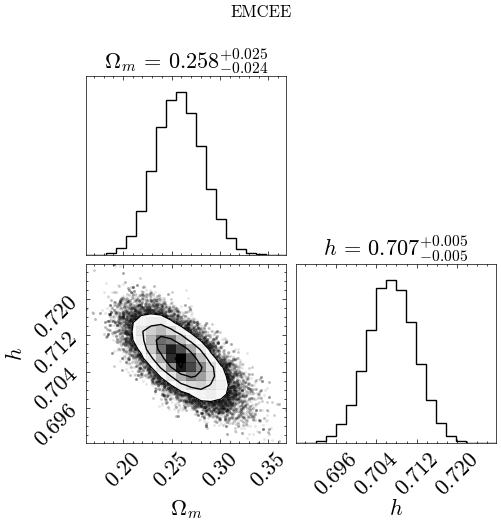

In [ ]:
#emcee corner
labels = [r"$\Omega_m$", r"$h$"]

# Create the corner plot
fig = corner.corner(emcee_samples, labels=labels, show_titles=True, title_fmt=".3f")

# Display the plot
fig.suptitle('EMCEE')
plt.subplots_adjust(top=0.85)
plt.show()